In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [3]:
covid = pd.read_csv('Covid19.csv', parse_dates= ['Date_reported'])

In [18]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Cumulative_cases_prev,Cumulative_deaths_prev,year
0,2020-01-04,AF,Afghanistan,EMR,0.0,0,0.0,0,0,0,2020
1,2020-01-05,AF,Afghanistan,EMR,0.0,0,0.0,0,0,0,2020
2,2020-01-06,AF,Afghanistan,EMR,0.0,0,0.0,0,0,0,2020
3,2020-01-07,AF,Afghanistan,EMR,0.0,0,0.0,0,0,0,2020
4,2020-01-08,AF,Afghanistan,EMR,0.0,0,0.0,0,0,0,2020


In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487680 entries, 0 to 487679
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      487680 non-null  datetime64[ns]
 1   Country_code       485648 non-null  object        
 2   Country            487680 non-null  object        
 3   WHO_region         487680 non-null  object        
 4   New_cases          210274 non-null  float64       
 5   Cumulative_cases   487680 non-null  int64         
 6   New_deaths         153909 non-null  float64       
 7   Cumulative_deaths  487680 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 29.8+ MB


In [6]:
covid['New_cases'].isna().sum()

277406

<h3>56% Of data is missing</h3>

In [7]:
covid = covid.sort_values(["Country", "WHO_region", "Date_reported"]).reset_index(drop = True)

In [8]:
grouped_data = covid.groupby(['Country'	,'WHO_region'])

<h3>Sorting and grouping data for preparing for shifting operations</h3>

In [9]:
covid["Cumulative_cases_prev"] = grouped_data["Cumulative_cases"].shift(1, fill_value= 0)
covid["Cumulative_deaths_prev"] = grouped_data["Cumulative_deaths"].shift(1, fill_value= 0)

<h3>Shifting the data of the cumulative columns  to create a new column indicating the previous cumulative data</h3>

In [10]:
covid.isna().sum()

Date_reported                  0
Country_code                2032
Country                        0
WHO_region                     0
New_cases                 277406
Cumulative_cases               0
New_deaths                333771
Cumulative_deaths              0
Cumulative_cases_prev          0
Cumulative_deaths_prev         0
dtype: int64

In [11]:
covid['New_cases'] = covid.apply(
    lambda row: (row['Cumulative_cases'] - row['Cumulative_cases_prev']) if pd.isna(row['New_cases']) else row['New_cases'], axis= 1
)

<h3>Subtracting the previous cumulative cases to the current cumulative cases to fill the missing new cases values</h3>

In [12]:
covid['New_deaths'] = covid.apply(
    lambda row: (row['Cumulative_deaths'] - row['Cumulative_deaths_prev']) if pd.isna(row['New_deaths']) else row['New_deaths'], axis= 1
)

<h3>Subtracting the previous cumulative cases to the current cumulative cases to fill the missing new cases values</h3>

In [13]:
covid.dropna(inplace= True)

<h3>Dropping the missing Columns from country code columns since it's less than 5% o the data</h3>

In [14]:
covid.isna().sum()

Date_reported             0
Country_code              0
Country                   0
WHO_region                0
New_cases                 0
Cumulative_cases          0
New_deaths                0
Cumulative_deaths         0
Cumulative_cases_prev     0
Cumulative_deaths_prev    0
dtype: int64

<h3>All the missing values are imputed or deleted</h3>

In [15]:
covid['year'] = covid['Date_reported'].dt.year

In [29]:
sns.set_style('darkgrid')

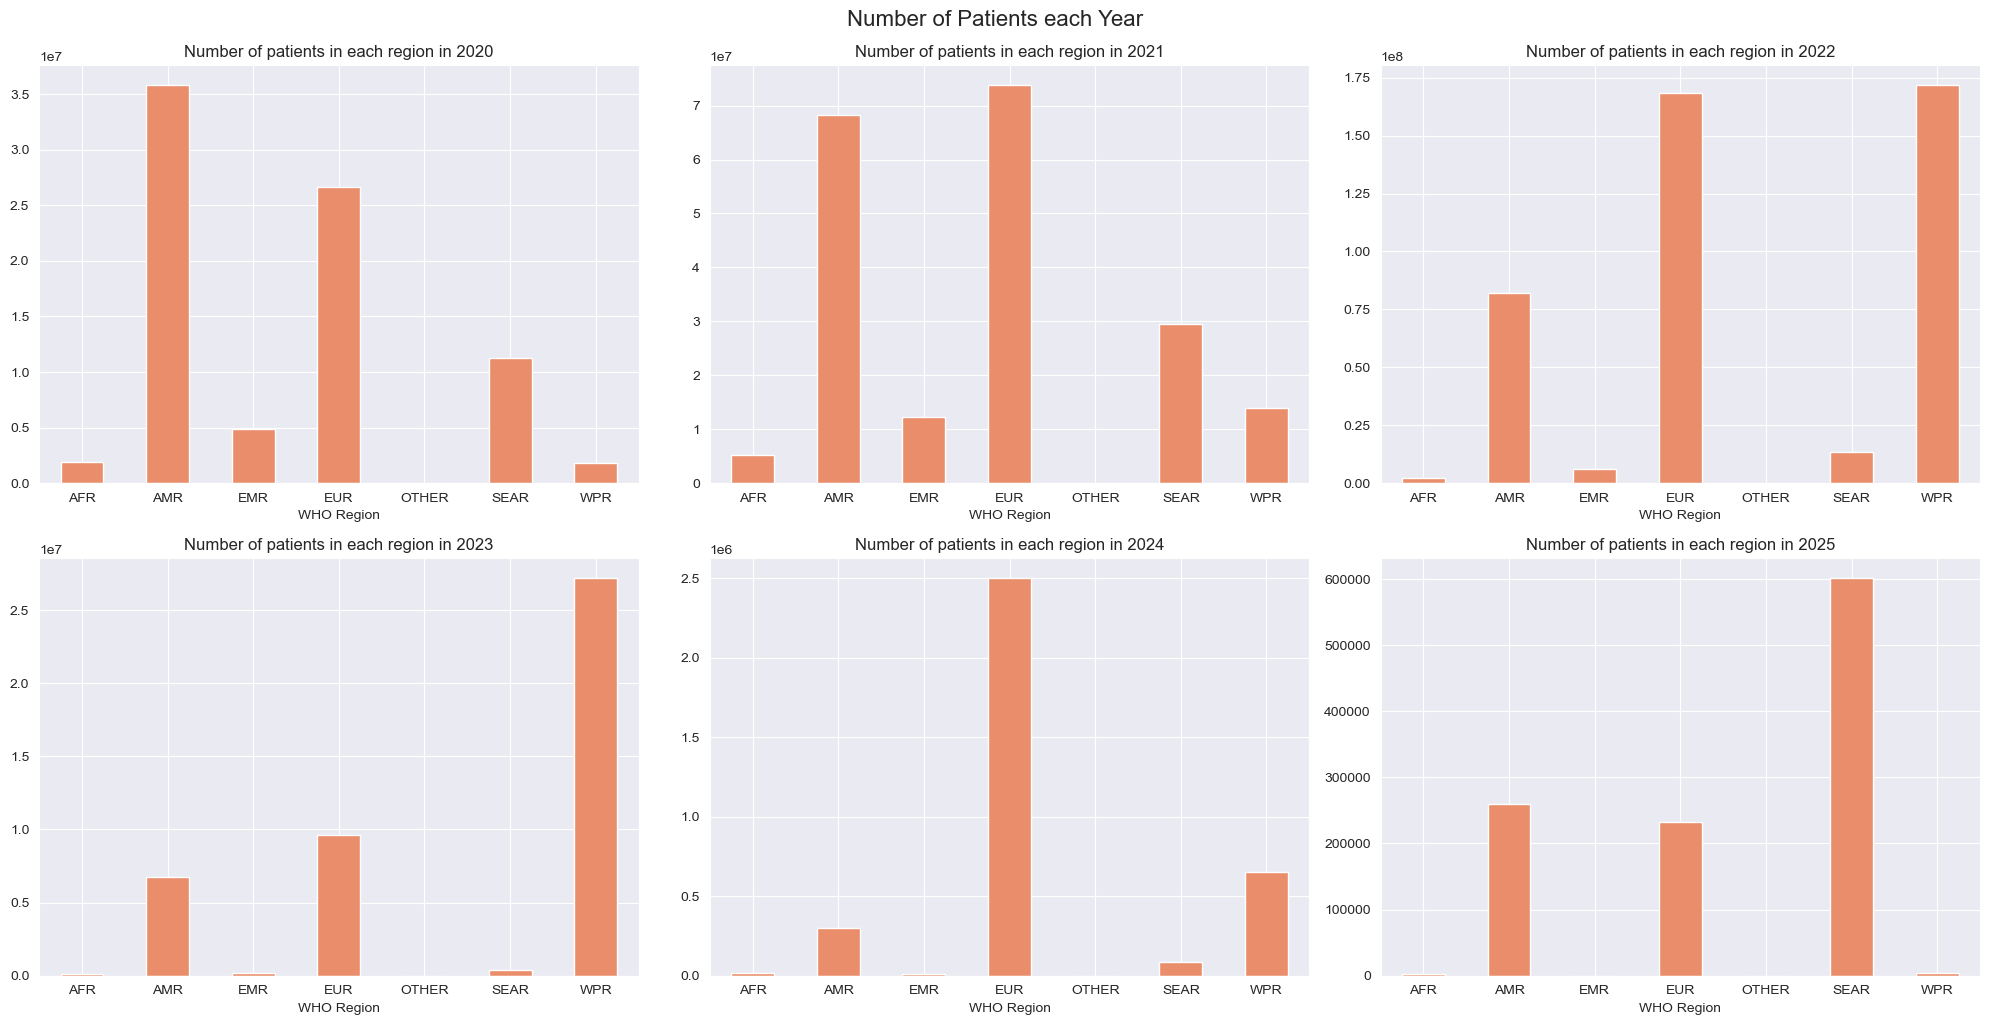

In [62]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()
for y, c in enumerate(covid['year'].unique()):
    covid[covid['year'] == c].groupby('WHO_region')['New_cases'].sum().plot(kind='bar', ax=axs[y])
    axs[y].set_xticklabels(axs[y].get_xticklabels(), rotation=0)
    axs[y].set_xlabel('WHO Region')
    axs[y].set_title(f'Number of patients in each region in {c}')

plt.tight_layout()
plt.suptitle('Number of Patients each Year', x=0.5, y=1.02, fontsize=16)
plt.show()

<h3>2022 Was the year with the most number of cases</h3>

<h2>Studying 2022</h2>

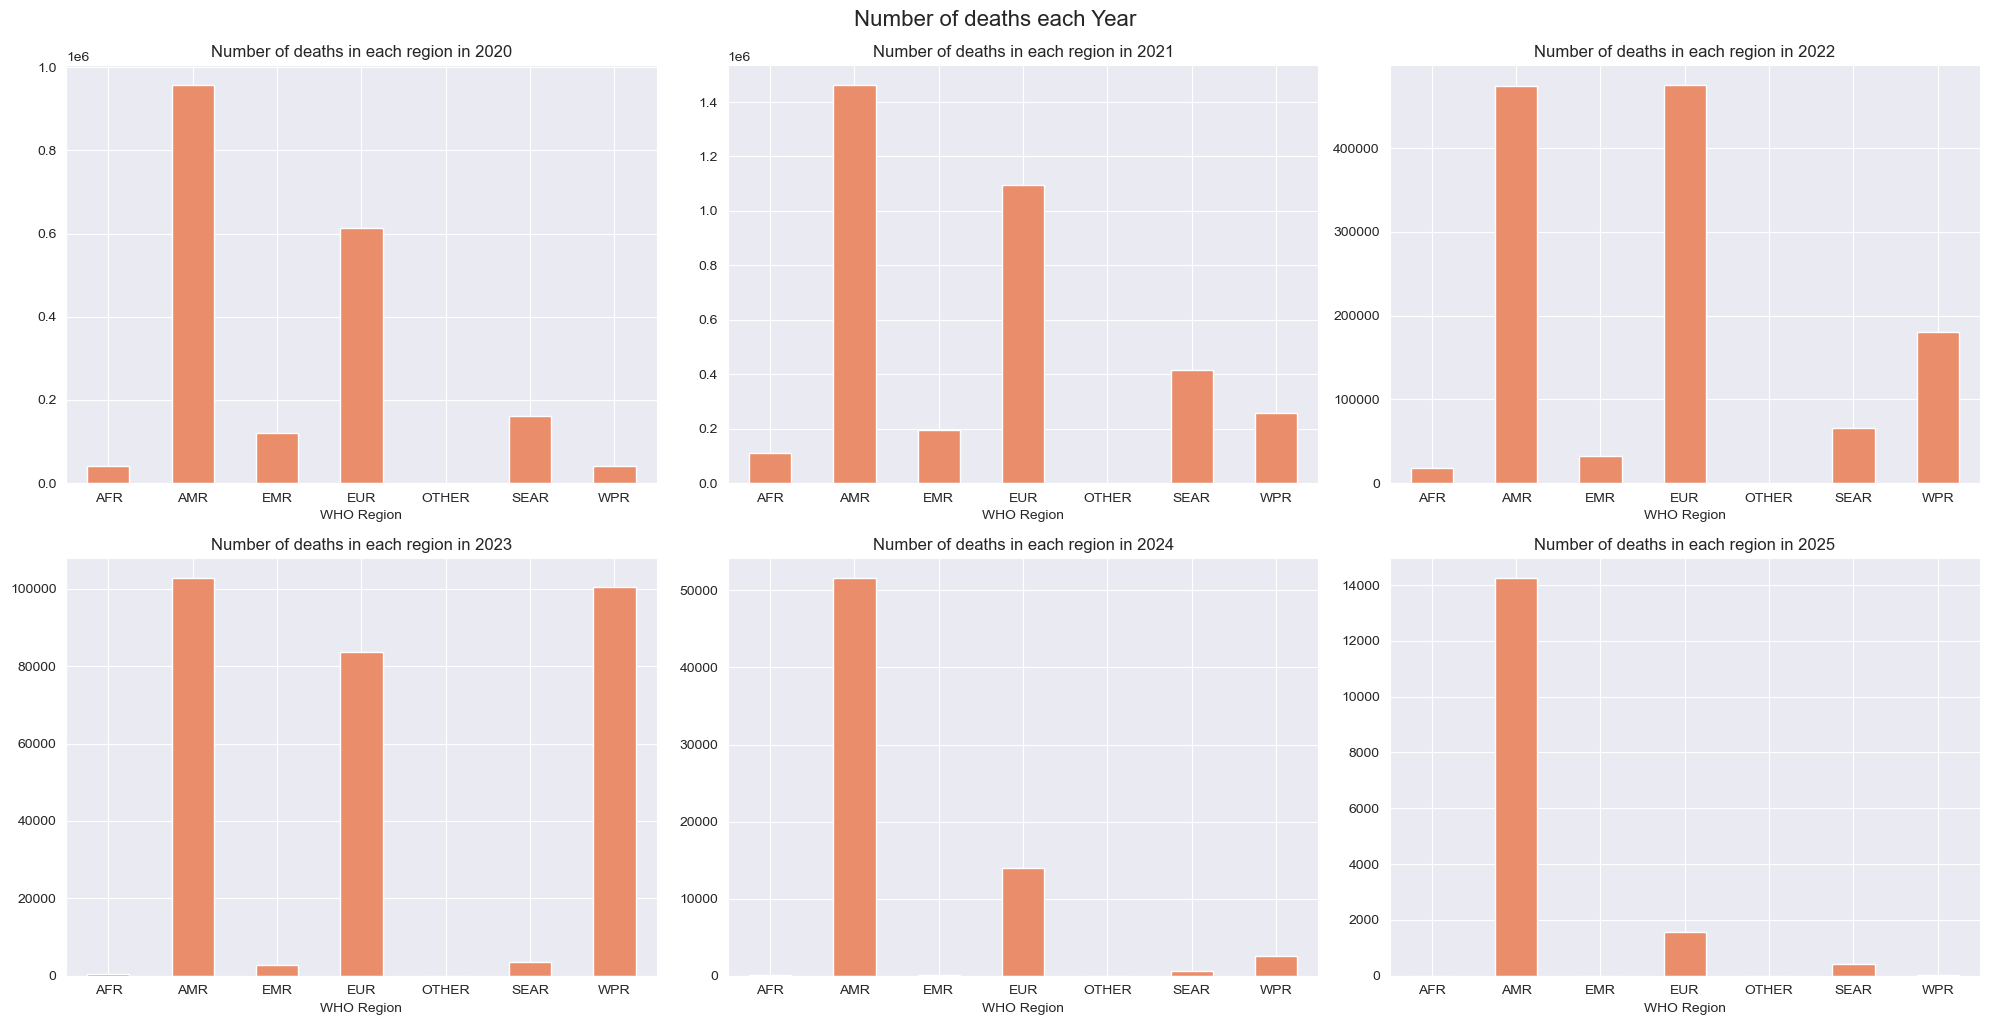

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
axs = axs.flatten()
for y, c in enumerate(covid['year'].unique()):
    covid[covid['year'] == c].groupby('WHO_region')['New_deaths'].sum().plot(kind='bar', ax=axs[y])
    axs[y].set_xticklabels(axs[y].get_xticklabels(), rotation=0)
    axs[y].set_xlabel('WHO Region')
    axs[y].set_title(f'Number of deaths in each region in {c}')

plt.tight_layout()
plt.suptitle('Number of deaths each Year', x=0.5, y=1.02, fontsize=16)
plt.show()

<h3>2021 was the year with the most number of deaths</h3>

<h2>Studying 2021</h2>

In [72]:
year2021 = covid[covid['year'] == 2021]

In [73]:
year2021['month'] = year2021['Date_reported'].dt.month

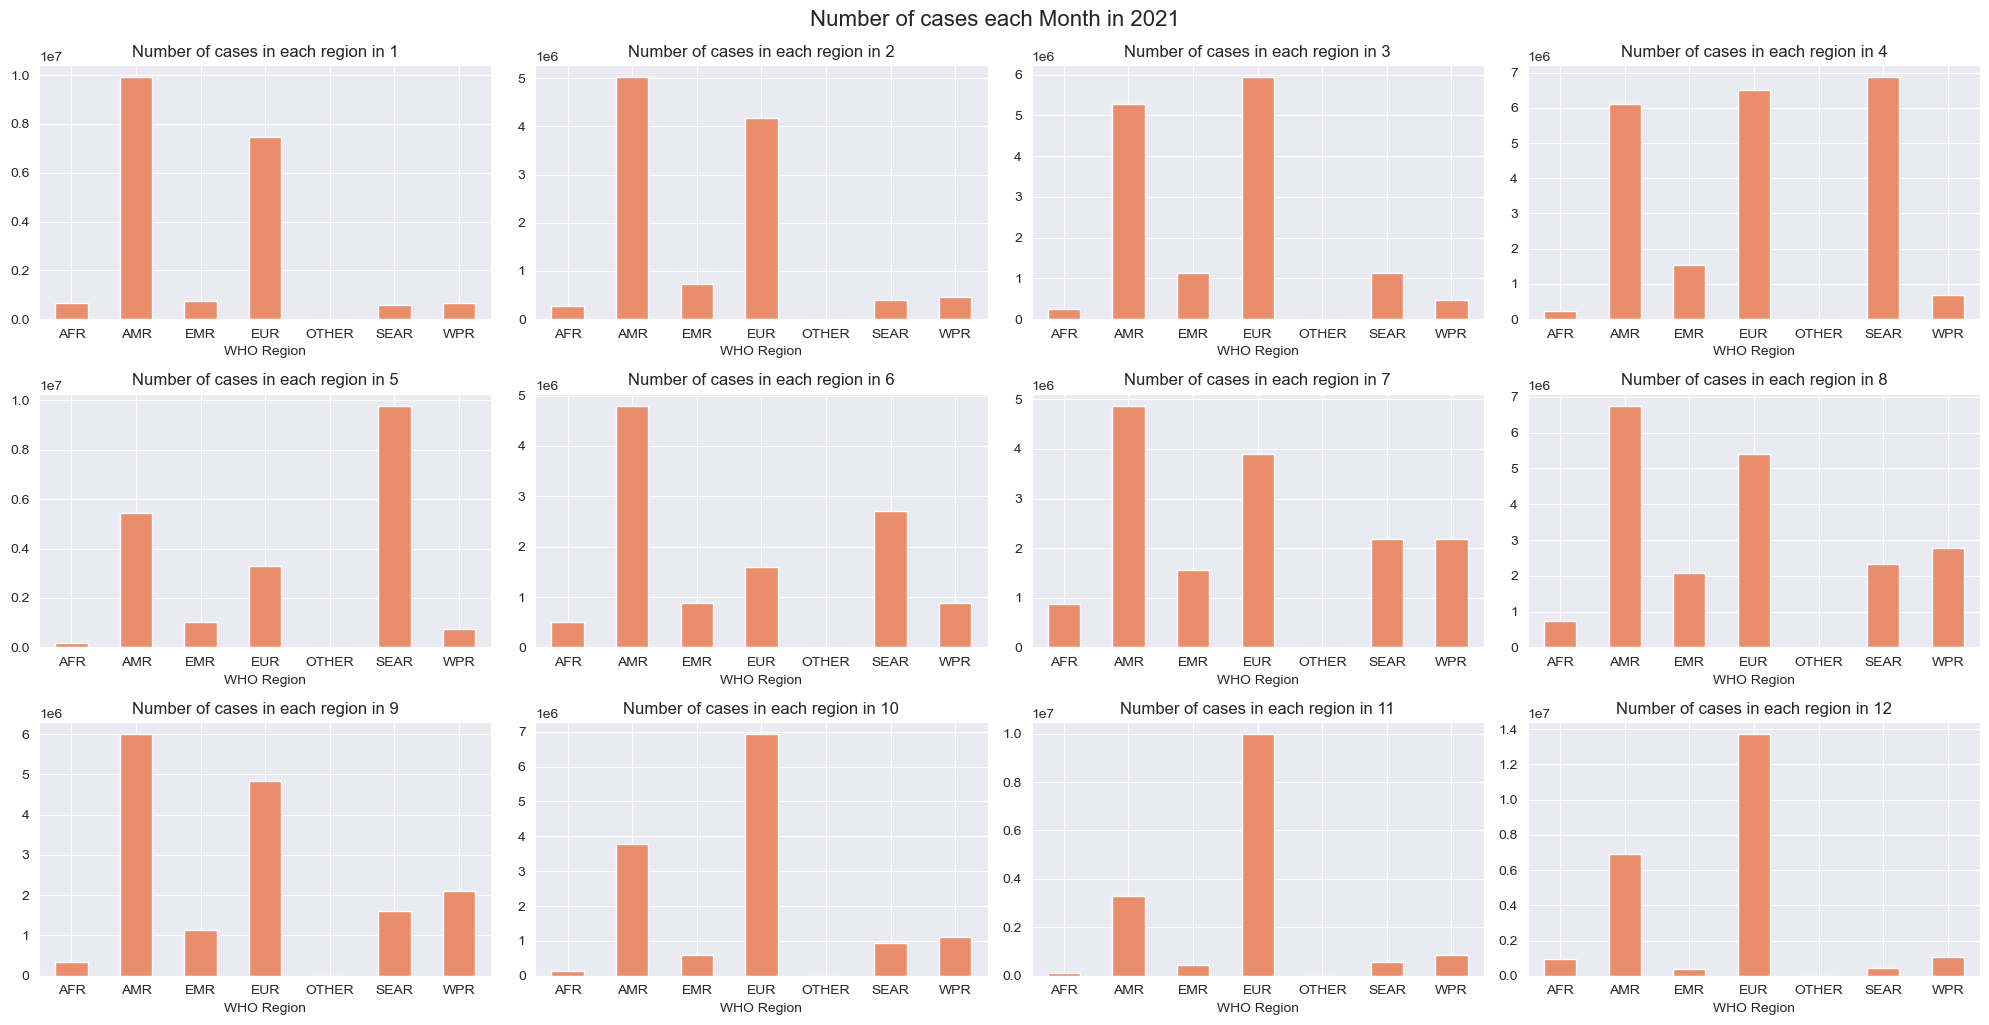

In [80]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(20, 10))
axs = axs.flatten()
for y, c in enumerate(year2021['month'].unique()):
    year2021[year2021['month'] == c].groupby('WHO_region')['New_cases'].sum().plot(kind='bar', ax=axs[y])
    axs[y].set_xticklabels(axs[y].get_xticklabels(), rotation=0)
    axs[y].set_xlabel('WHO Region')
    axs[y].set_title(f'Number of cases in each region in {c}')

plt.tight_layout()
plt.suptitle('Number of cases each Month in 2021', x=0.5, y=1.02, fontsize=16)
plt.show()

<h3>January was the month with the most number of deaths</h3>

In [ ]:
year2021['New_cases'].corr(year2021['New_deaths'])

0.7723356390987282

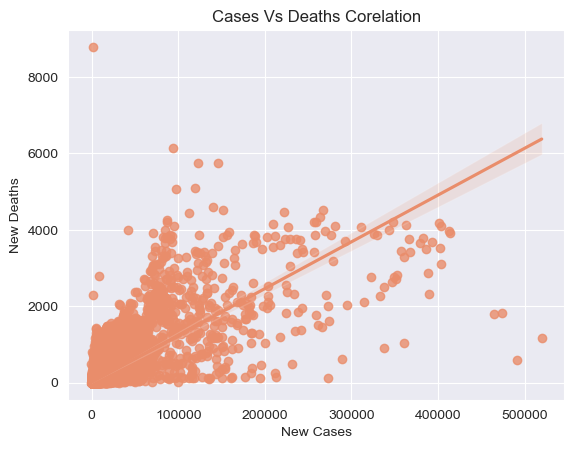

In [81]:
sns.regplot(data= year2021, x= 'New_cases', y= 'New_deaths')
plt.xlabel('New Cases')
plt.ylabel('New Deaths')
plt.title("Cases Vs Deaths Corelation")
plt.show()

<h3>Correlation Between Deaths and Cases is 77%</h3>